In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

## LOad DataSet

In [2]:
# بحدد الداتا بتاعتي classfication or regrssion passed on my target columns 
pd.set_option('display.max_columns', None)
df=pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.describe().round(2)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


In [5]:
df.describe(include='O')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [6]:
# round(df.isna().mean(),3)*100
round(df.isna().mean(),2)*100

Country                             0.0
Year                                0.0
Status                              0.0
Life expectancy                     0.0
Adult Mortality                     0.0
infant deaths                       0.0
Alcohol                             7.0
percentage expenditure              0.0
Hepatitis B                        19.0
Measles                             0.0
 BMI                                1.0
under-five deaths                   0.0
Polio                               1.0
Total expenditure                   8.0
Diphtheria                          1.0
 HIV/AIDS                           0.0
GDP                                15.0
Population                         22.0
 thinness  1-19 years               1.0
 thinness 5-9 years                 1.0
Income composition of resources     6.0
Schooling                           6.0
dtype: float64

In [7]:
df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100

np.float64(3.965282505105514)

## Data Cleaning 

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
# strip()->> بتشيل اي مسافات في الداتا في الاول او في الاخر 
df.columns=df.columns.str.strip().str.replace(' ','_')
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

## check for Categorical_cols

In [10]:
cat_col=df.select_dtypes(include='O').columns
cat_col

Index(['Country', 'Status'], dtype='object')

In [11]:
for col in cat_col:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('\n','*'*100,'\n')

Country
193
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic R

## check for numerical_cols

In [12]:
# هتجيب كل العواميد معادا الobject
# df.select_dtypes(exclude='O').columns
num_col=df.select_dtypes(include='number').columns

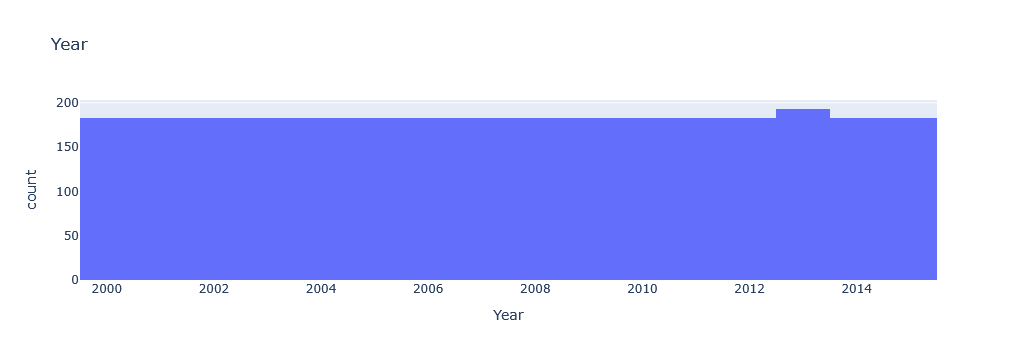

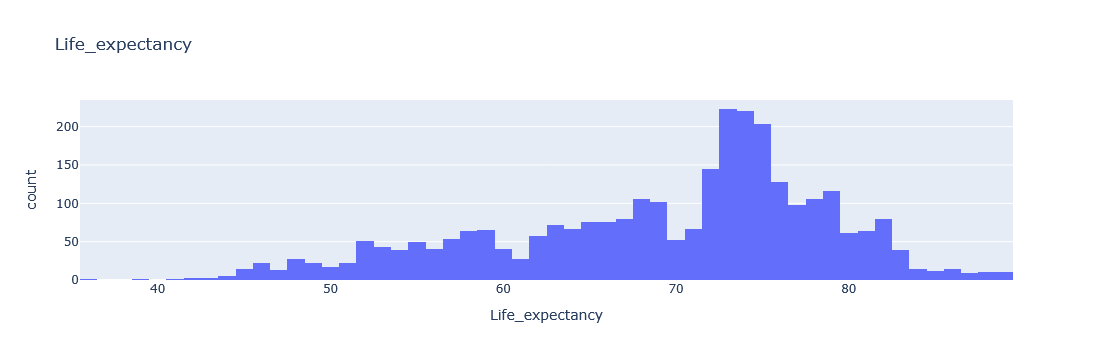

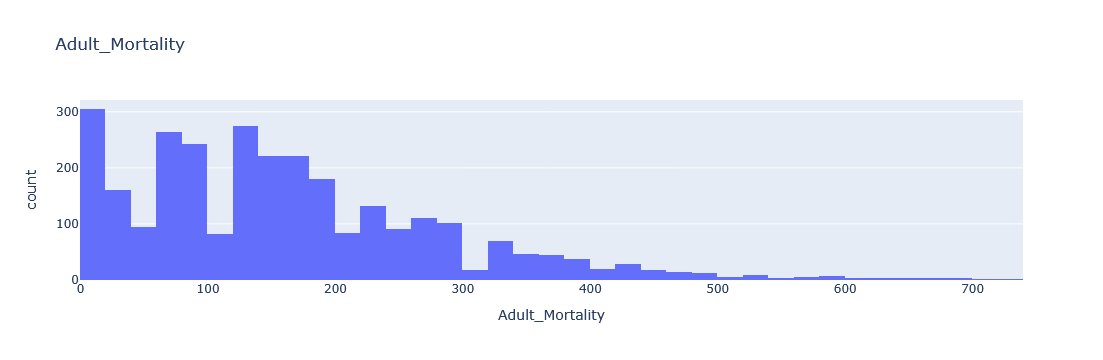

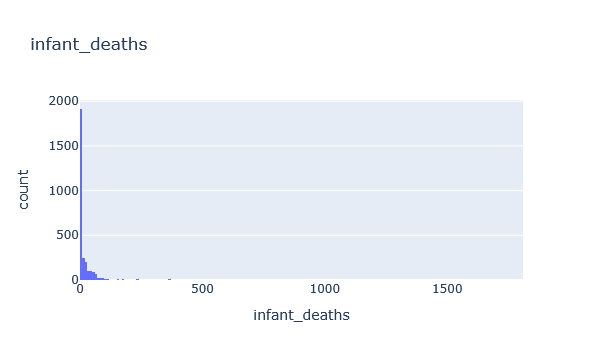

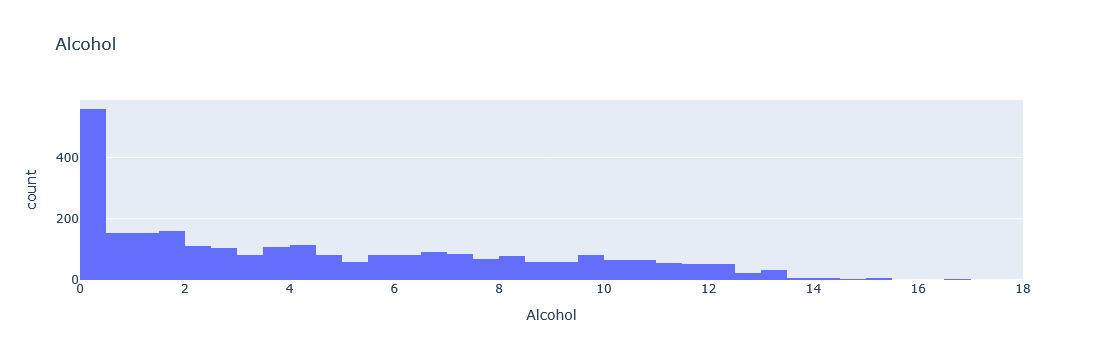

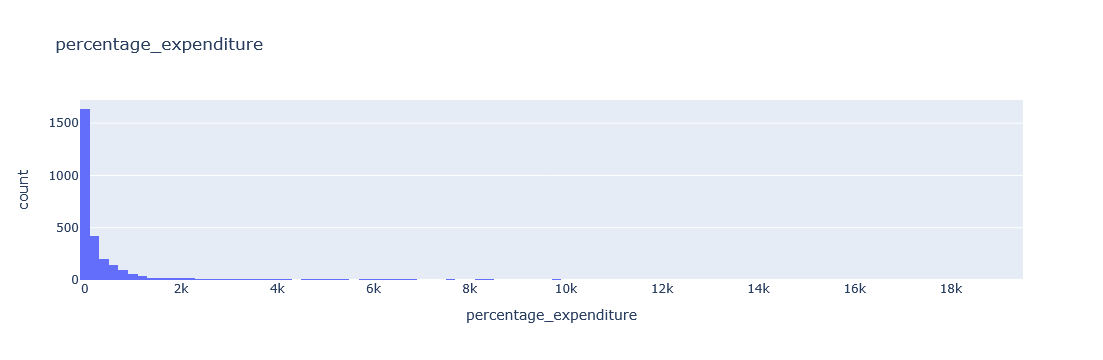

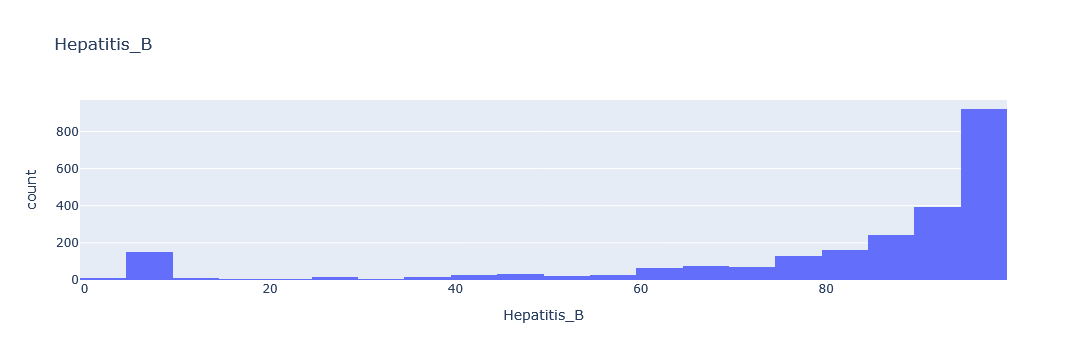

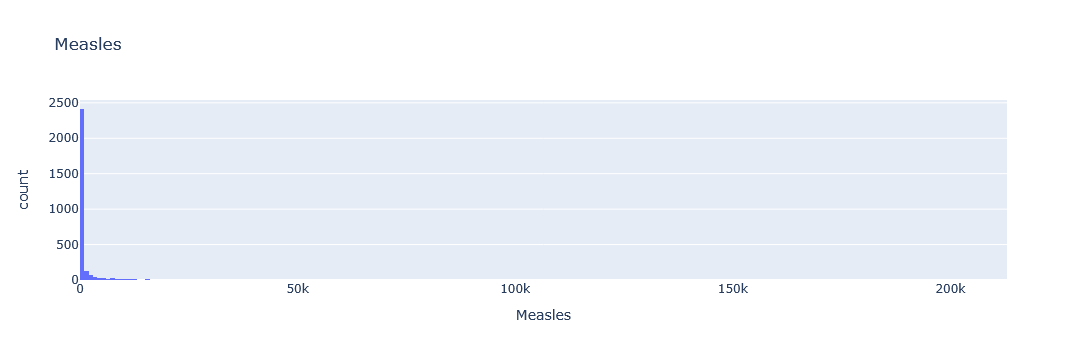

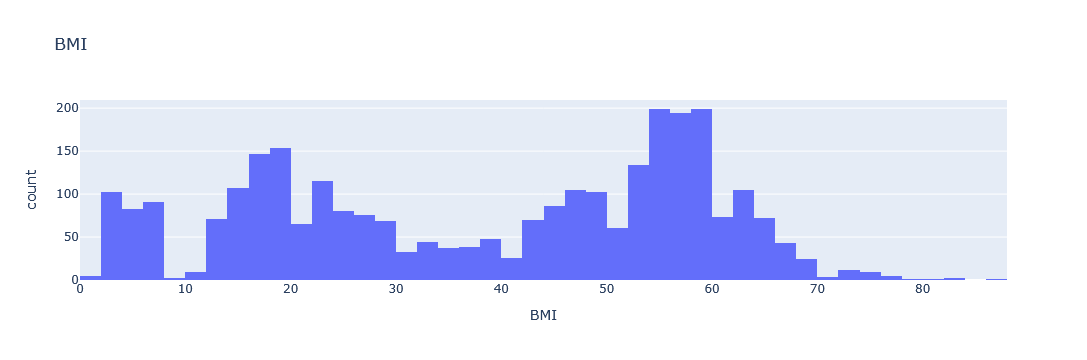

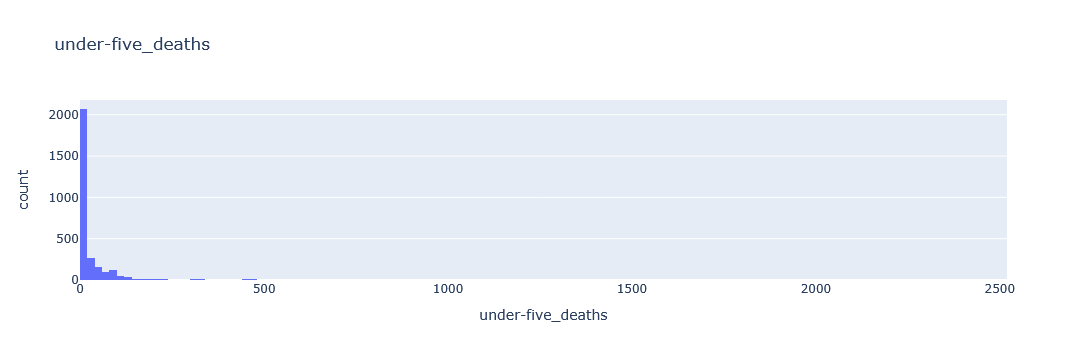

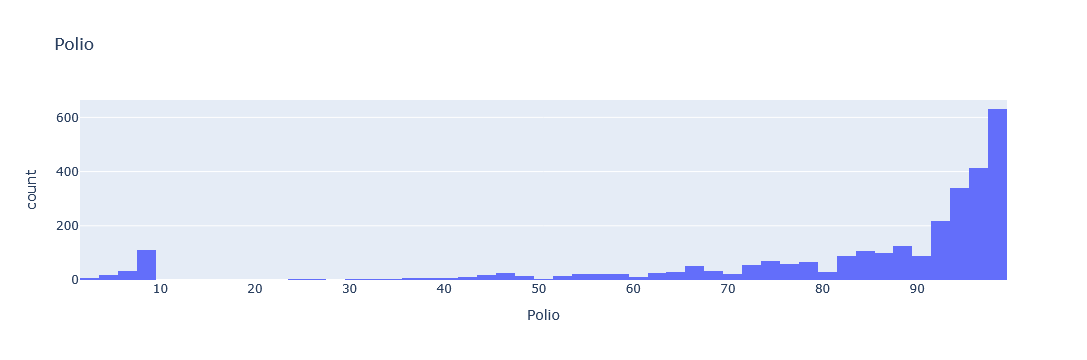

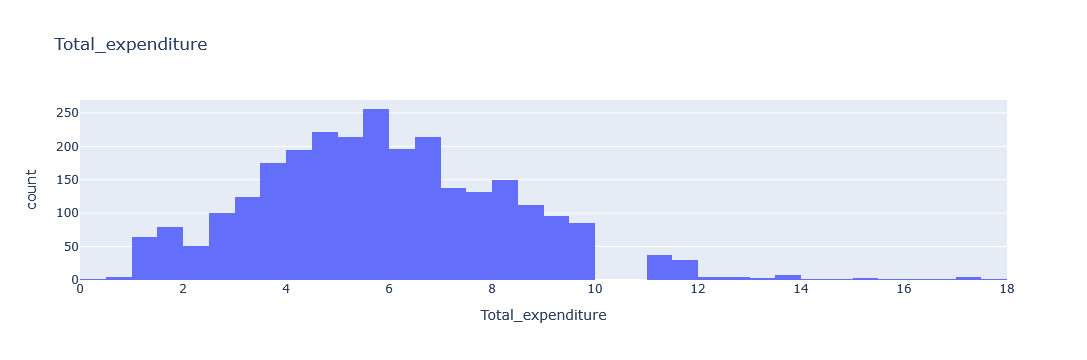

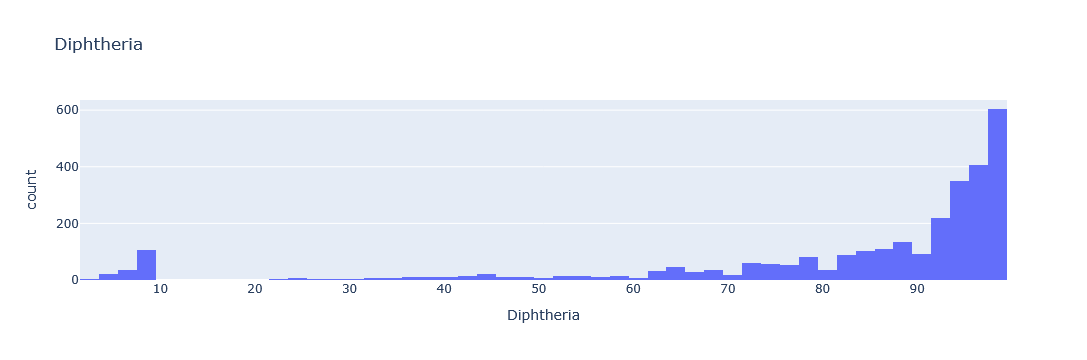

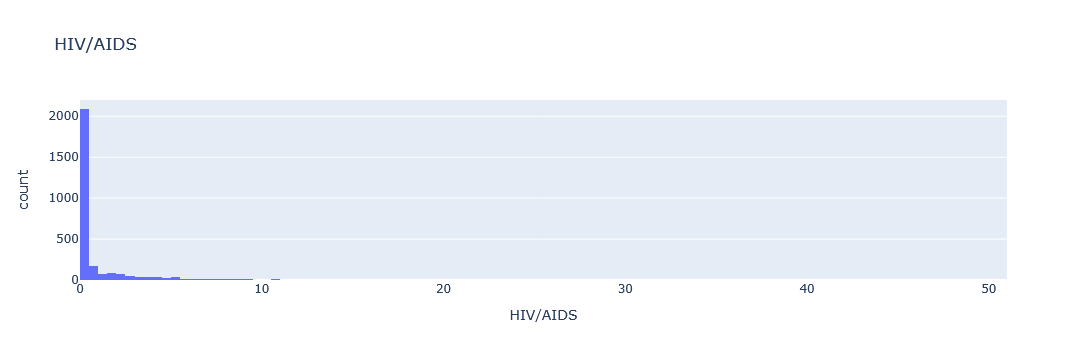

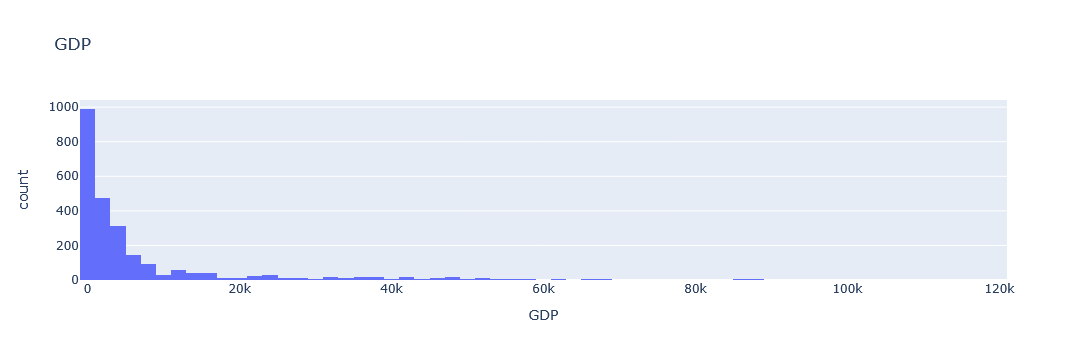

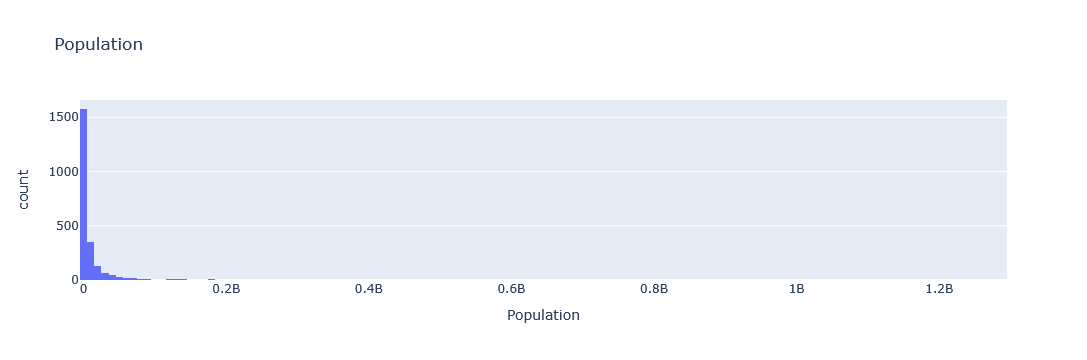

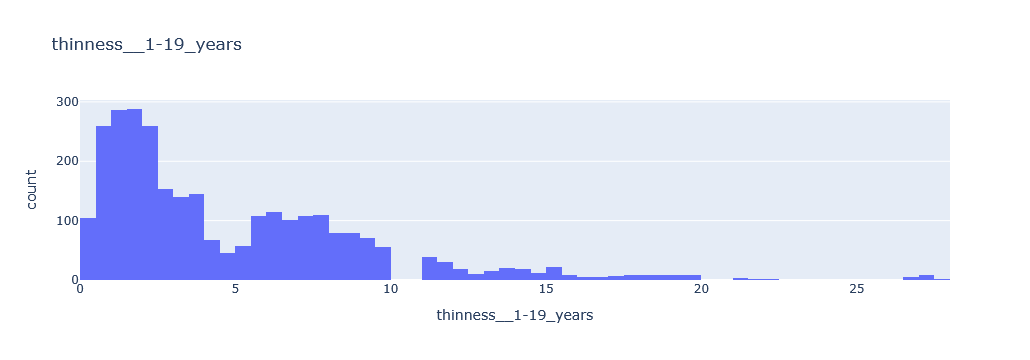

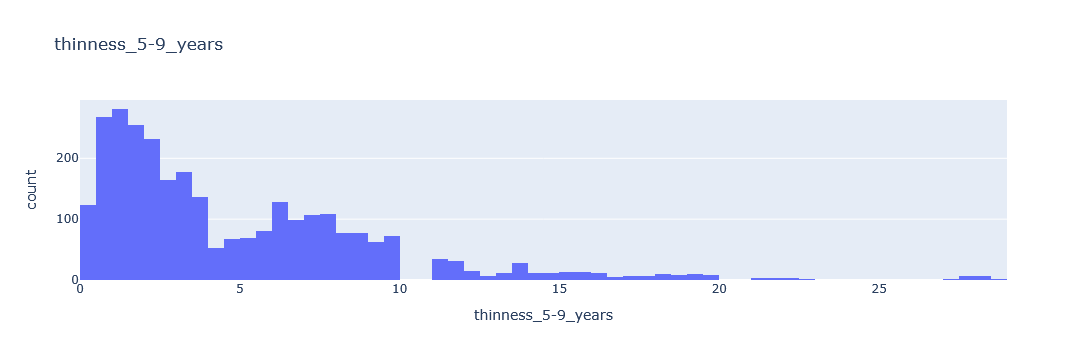

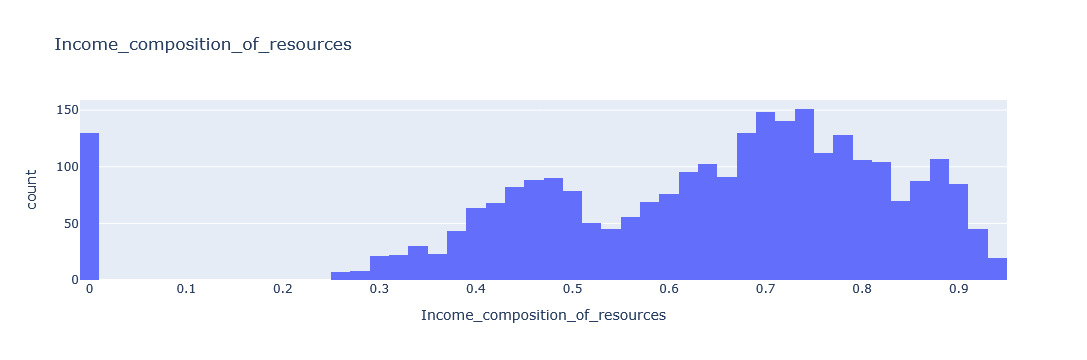

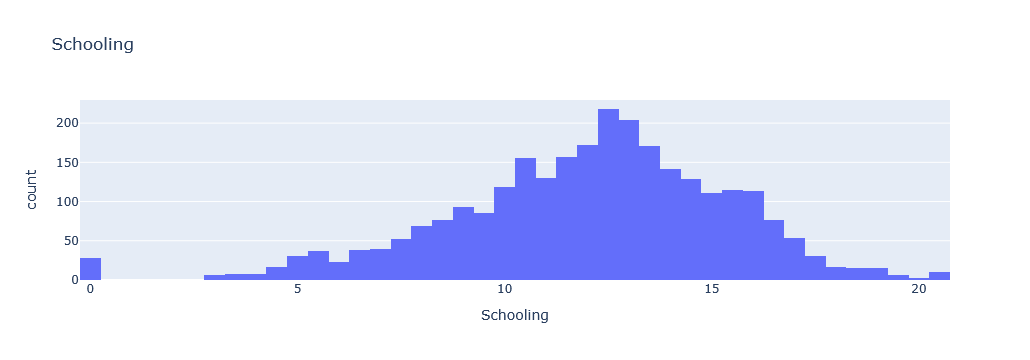

In [13]:
# histogram-> the best choice for univariad analysis 
for col in num_col:
    px.histogram(df,x=col,title=col).show()

In [14]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [15]:
df[df.infant_deaths==0]['Country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Austria', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan',
       'Bosnia and Herzegovina', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Cook Islands', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominica', 'Estonia', 'Fiji', 'Finland', 'Greece',
       'Grenada', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Kiribati', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg',
       'Maldives', 'Malta', 'Marshall Islands', 'Mauritius',
       'Micronesia (Federated States of)', 'Monaco', 'Montenegro',
       'Nauru', 'New Zealand', 'Niue', 'Norway', 'Palau', 'Portugal',
       'Qatar', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Seychelles', 'Singapore', 'Slovakia',
       'Slovenia', 'Solomon Islands', 'Suriname', 'Sweden', 'Switzerland',
       'The former Yugoslav republic of Macedonia', 'Tong

In [16]:
df[df.GDP <0]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling


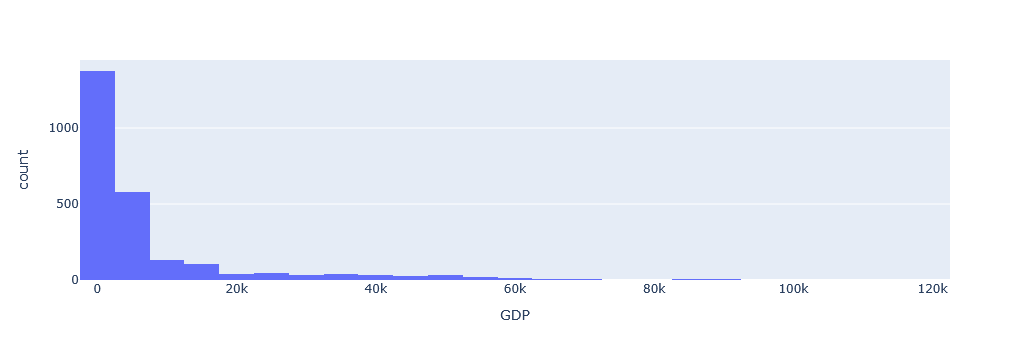

In [17]:
px.histogram(df,x='GDP',nbins=40)

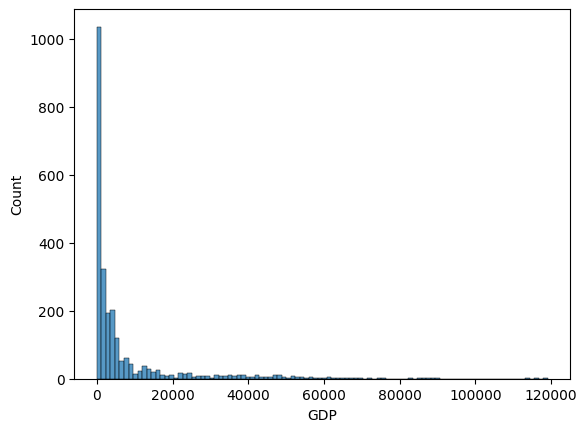

In [18]:
sns.histplot(data=df,x='GDP')
plt.show()

## feature Engineering 

In [19]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [20]:
df=df.rename(columns={'thinness__1-19_years':'thinness__10-19_years'})

## Data Analysis 

## how does Adult_Mortality relate to Life_expectancy ?

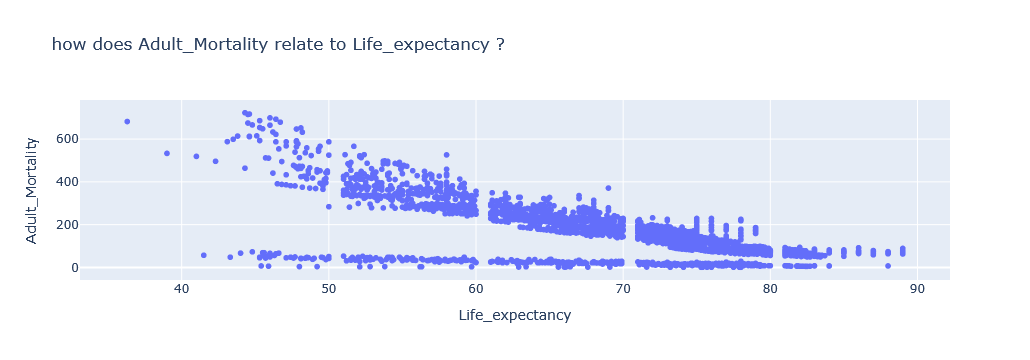

In [21]:
px.scatter(data_frame=df,x='Life_expectancy',y='Adult_Mortality',title='how does Adult_Mortality relate to Life_expectancy ?')


In [22]:
df[['Life_expectancy','Adult_Mortality']].corr()

,Life_expectancy,Adult_Mortality
Life_expectancy,1.000000,-0.696359
Adult_Mortality,-0.696359,1.000000


## Do developed and developing countries differ significantly in average life expectancy?

In [23]:
le_per_status=df.groupby('Status')['Life_expectancy'].mean().round(1).reset_index()
le_per_status

,Status,Life_expectancy
0,Developed,79.2
1,Developing,67.1


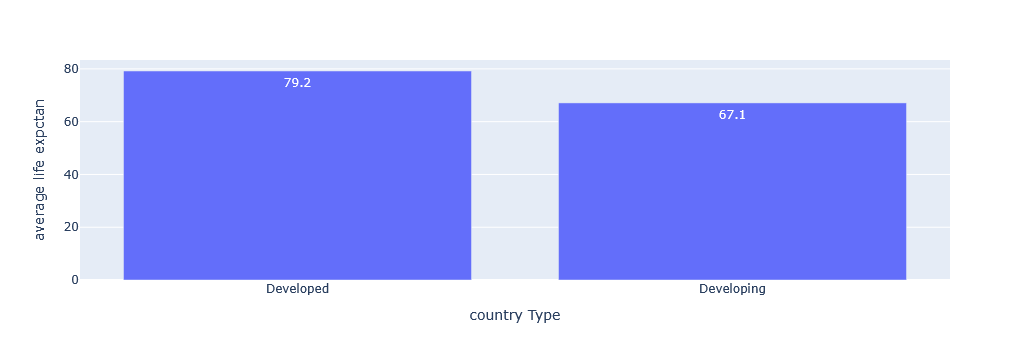

In [24]:
px.bar(le_per_status,x='Status',y='Life_expectancy',labels={'Status':'country Type','Life_expectancy':'average life expctan'},text_auto=True)

## what is the average of Expenditure per country per year?

In [25]:
status_per_year=df.groupby(['Status','Year'])['Total_expenditure'].mean().round(2).reset_index()
status_per_year

,Status,Year,Total_expenditure
0,Developed,2000,7.02
1,Developed,2001,6.82
2,Developed,2002,7.11
3,Developed,2003,7.14
4,Developed,2004,7.48
5,Developed,2005,7.50
6,Developed,2006,7.42
7,Developed,2007,7.35
8,Developed,2008,7.13
9,Developed,2009,8.35


In [26]:
df['Year']

0       2015
1       2014
2       2013
3       2012
4       2011
        ... 
2933    2004
2934    2003
2935    2002
2936    2001
2937    2000
Name: Year, Length: 2938, dtype: int64

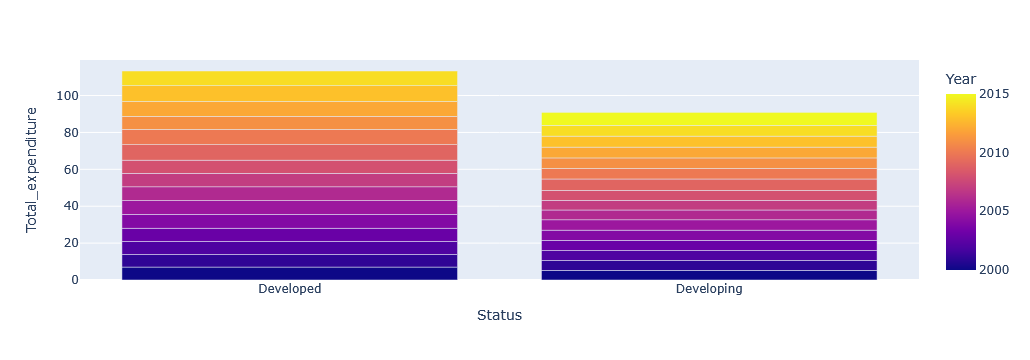

In [27]:
px.bar(status_per_year,x='Status',y='Total_expenditure',color='Year')

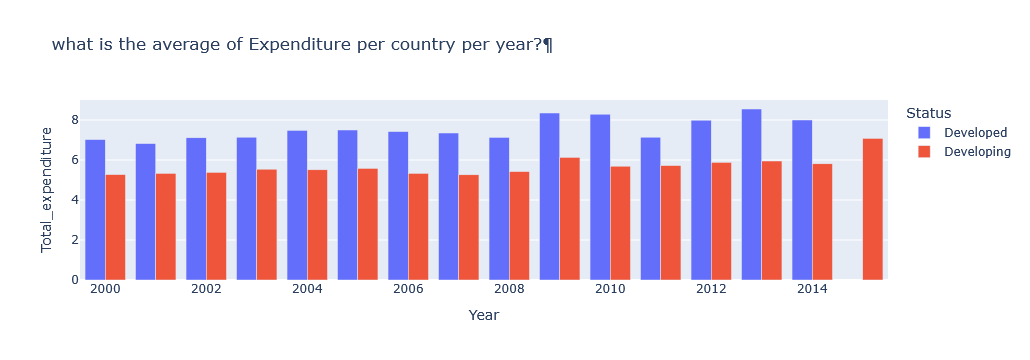

In [28]:
px.bar(status_per_year,x='Year',y='Total_expenditure',barmode='group',color='Status',title='what is the average of Expenditure per country per year?¶')

## Data Preprocessing 

In [29]:
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__10-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## spliting

In [30]:
x=df.drop('Life_expectancy',axis=1)
y=df['Life_expectancy']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


In [32]:
x_train

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__10-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
456,Cabo Verde,2007,Developing,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9
462,Cabo Verde,2001,Developing,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0
2172,Saint Lucia,2011,Developing,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9
2667,Tunisia,2013,Developing,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7
381,Brunei Darussalam,2002,Developing,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Malta,2011,Developed,59.0,0,6.91,3601.287457,82.0,3,68.0,0,96.0,9.60,96.0,0.1,22821.847000,416268.0,0.8,0.7,0.826,14.8
1095,Guinea-Bissau,2010,Developing,287.0,4,3.21,53.307827,83.0,26,23.1,7,82.0,6.70,83.0,5.9,543.957418,155588.0,8.0,7.9,0.405,8.9
1130,Haiti,2007,Developing,266.0,17,6.08,56.778587,NaN,0,4.7,23,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,4.2,0.458,8.4
1294,Italy,2003,Developed,72.0,2,9.30,3519.258515,95.0,10982,57.0,3,97.0,8.17,96.0,0.1,27387.225800,5731323.0,0.5,0.5,0.841,15.4


In [33]:
x_test

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__10-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
2546,Syrian Arab Republic,2006,Developing,123.0,8,0.97,122.652333,83.0,517,48.5,10,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
650,Croatia,2006,Developed,113.0,0,11.83,1555.651986,NaN,1,58.1,0,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
1740,Montenegro,2007,Developing,125.0,0,4.98,678.518894,9.0,0,57.2,0,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
177,Bahrain,2014,Developing,7.0,0,1.57,367.255674,98.0,46,62.9,0,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,6.0,0.820,14.5
1377,Kenya,2000,Developing,428.0,77,1.51,0.681686,NaN,21002,14.4,121,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Eritrea,2006,Developing,336.0,7,0.97,10.602698,94.0,128,14.3,9,94.0,3.30,94.0,1.4,297.828588,466648.0,9.3,9.3,0.405,5.3
1405,Kuwait,2004,Developing,91.0,0,0.02,1731.073528,94.0,23,65.9,1,98.0,2.76,98.0,0.1,26921.827800,NaN,3.2,3.0,0.791,14.4
962,Gambia,2015,Developing,262.0,3,NaN,0.000000,97.0,71,27.3,5,96.0,NaN,97.0,1.7,NaN,NaN,7.3,7.2,0.450,8.9
2658,Trinidad and Tobago,2006,Developing,188.0,0,6.35,103.371069,89.0,0,38.4,0,89.0,4.49,92.0,0.6,1495.963370,133144.0,6.2,6.6,0.751,12.3


## categorical Data

In [34]:
cat_col

Index(['Country', 'Status'], dtype='object')

In [35]:
x_train[cat_col].isna().sum()

Country    0
Status     0
dtype: int64

In [36]:
x_train[cat_col]

,Country,Status
456,Cabo Verde,Developing
462,Cabo Verde,Developing
2172,Saint Lucia,Developing
2667,Tunisia,Developing
381,Brunei Darussalam,Developing
...,...,...
1638,Malta,Developed
1095,Guinea-Bissau,Developing
1130,Haiti,Developing
1294,Italy,Developed


In [37]:
for col in cat_col:
    print(col)
    print(x_train[col].nunique())

Country
191
Status
2


In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False)
x_train['Status_developing']=ohe.fit_transform(x_train[['Status']])
x_test['Status_developing']=ohe.transform(x_test[['Status']])

In [39]:
x_train

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__10-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Status_developing
456,Cabo Verde,2007,Developing,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,1.0
462,Cabo Verde,2001,Developing,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,1.0
2172,Saint Lucia,2011,Developing,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9,1.0
2667,Tunisia,2013,Developing,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,1.0
381,Brunei Darussalam,2002,Developing,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Malta,2011,Developed,59.0,0,6.91,3601.287457,82.0,3,68.0,0,96.0,9.60,96.0,0.1,22821.847000,416268.0,0.8,0.7,0.826,14.8,0.0
1095,Guinea-Bissau,2010,Developing,287.0,4,3.21,53.307827,83.0,26,23.1,7,82.0,6.70,83.0,5.9,543.957418,155588.0,8.0,7.9,0.405,8.9,1.0
1130,Haiti,2007,Developing,266.0,17,6.08,56.778587,NaN,0,4.7,23,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,4.2,0.458,8.4,1.0
1294,Italy,2003,Developed,72.0,2,9.30,3519.258515,95.0,10982,57.0,3,97.0,8.17,96.0,0.1,27387.225800,5731323.0,0.5,0.5,0.841,15.4,0.0


In [40]:
x_train['Status_developing'].nunique()

2

In [41]:
x_train.drop('Status',axis=1,inplace=True)
x_test.drop('Status',axis=1,inplace=True)

In [42]:
x_train.duplicated().sum()

np.int64(0)

In [43]:
x_train

,Country,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__10-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Status_developing
456,Cabo Verde,2007,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,1.0
462,Cabo Verde,2001,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,1.0
2172,Saint Lucia,2011,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9,1.0
2667,Tunisia,2013,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,1.0
381,Brunei Darussalam,2002,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Malta,2011,59.0,0,6.91,3601.287457,82.0,3,68.0,0,96.0,9.60,96.0,0.1,22821.847000,416268.0,0.8,0.7,0.826,14.8,0.0
1095,Guinea-Bissau,2010,287.0,4,3.21,53.307827,83.0,26,23.1,7,82.0,6.70,83.0,5.9,543.957418,155588.0,8.0,7.9,0.405,8.9,1.0
1130,Haiti,2007,266.0,17,6.08,56.778587,NaN,0,4.7,23,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,4.2,0.458,8.4,1.0
1294,Italy,2003,72.0,2,9.30,3519.258515,95.0,10982,57.0,3,97.0,8.17,96.0,0.1,27387.225800,5731323.0,0.5,0.5,0.841,15.4,0.0


In [47]:
from category_encoders import BinaryEncoder
be=BinaryEncoder()
be_x_train=be.fit_transform(x_train[['Country']])
be_x_test=be.transform(x_test[['Country']])

In [48]:
be_x_train

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7
456,0,0,0,0,0,0,0,1
462,0,0,0,0,0,0,0,1
2172,0,0,0,0,0,0,1,0
2667,0,0,0,0,0,0,1,1
381,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1638,0,1,0,1,0,1,0,1
1095,0,0,0,1,0,0,0,1
1130,1,0,0,0,1,0,1,1
1294,1,0,1,0,1,1,1,1


In [49]:
be_x_test

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7
2546,1,0,1,1,0,1,0,1
650,0,1,0,1,0,1,0,0
1740,0,0,1,1,0,0,0,1
177,0,0,1,1,1,1,1,0
1377,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
859,0,1,1,0,1,0,1,1
1405,0,0,0,0,1,1,0,0
962,0,1,0,0,0,1,0,1
2658,0,1,1,1,1,0,0,1


In [50]:
x_train=pd.concat([x_train.reset_index(drop=True),be_x_train.reset_index(drop=True)],axis=1).drop('Country',axis=1)
x_test=pd.concat([x_test.reset_index(drop=True),be_x_test.reset_index(drop=True)],axis=1).drop('Country',axis=1)

## numerical cols 

In [59]:
round(x_train.isna().mean()*100,2)

Year                                0.00
Adult_Mortality                     0.34
infant_deaths                       0.00
Alcohol                             6.72
percentage_expenditure              0.00
Hepatitis_B                        18.68
Measles                             0.00
BMI                                 1.15
under-five_deaths                   0.00
Polio                               0.60
Total_expenditure                   7.87
Diphtheria                          0.60
HIV/AIDS                            0.00
GDP                                14.68
Population                         21.96
thinness__10-19_years               1.15
thinness_5-9_years                  1.15
Income_composition_of_resources     5.57
Schooling                           5.49
Status_developing                   0.00
Country_0                           0.00
Country_1                           0.00
Country_2                           0.00
Country_3                           0.00
Country_4       

In [62]:
x_train.dropna(subset=['Adult_Mortality','BMI','Polio','Diphtheria','thinness__10-19_years','thinness_5-9_years',],ignore_index=True,inplace=True)

In [63]:
x_test.dropna(subset=['Adult_Mortality','BMI','Polio','Diphtheria','thinness__10-19_years','thinness_5-9_years',],ignore_index=True,inplace=True)

In [66]:
x_train

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__10-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Status_developing,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7
0,2007,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,1.0,0,0,0,0,0,0,0,1
1,2001,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,1.0,0,0,0,0,0,0,0,1
2,2011,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9,1.0,0,0,0,0,0,0,1,0
3,2013,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,1.0,0,0,0,0,0,0,1,1
4,2002,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3,1.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,2011,59.0,0,6.91,3601.287457,82.0,3,68.0,0,96.0,9.60,96.0,0.1,22821.847000,416268.0,0.8,0.7,0.826,14.8,0.0,0,1,0,1,0,1,0,1
2306,2010,287.0,4,3.21,53.307827,83.0,26,23.1,7,82.0,6.70,83.0,5.9,543.957418,155588.0,8.0,7.9,0.405,8.9,1.0,0,0,0,1,0,0,0,1
2307,2007,266.0,17,6.08,56.778587,NaN,0,4.7,23,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,4.2,0.458,8.4,1.0,1,0,0,0,1,0,1,1
2308,2003,72.0,2,9.30,3519.258515,95.0,10982,57.0,3,97.0,8.17,96.0,0.1,27387.225800,5731323.0,0.5,0.5,0.841,15.4,0.0,1,0,1,0,1,1,1,1


In [67]:
# Hepatitis_B عباره عن ارقام int مش هينفع اعوض بالmean or knn -> عشان هيطلعوا ارقام float
# يعني من الاخر discrete مابنفعش كسور 
# countinous-> ينقع كسور 
for col in df['Hepatitis_B','']:
    print(col)

65.0
62.0
64.0
67.0
68.0
66.0
63.0
64.0
63.0
64.0
66.0
67.0
65.0
64.0
63.0
62.0
99.0
98.0
99.0
99.0
99.0
99.0
98.0
99.0
98.0
98.0
98.0
99.0
97.0
96.0
96.0
96.0
95.0
95.0
95.0
95.0
95.0
95.0
94.0
91.0
9.0
8.0
83.0
81.0
nan
nan
nan
nan
64.0
64.0
77.0
75.0
72.0
77.0
61.0
69.0
73.0
nan
nan
nan
nan
nan
nan
nan
99.0
99.0
99.0
98.0
99.0
98.0
98.0
98.0
97.0
99.0
99.0
97.0
99.0
99.0
96.0
nan
94.0
94.0
94.0
91.0
91.0
94.0
94.0
9.0
85.0
84.0
88.0
81.0
73.0
66.0
nan
nan
94.0
93.0
95.0
95.0
95.0
94.0
93.0
89.0
85.0
78.0
91.0
91.0
93.0
91.0
69.0
55.0
93.0
91.0
91.0
91.0
92.0
92.0
94.0
94.0
94.0
95.0
95.0
95.0
95.0
95.0
94.0
nan
93.0
98.0
95.0
92.0
89.0
86.0
83.0
83.0
85.0
83.0
86.0
83.0
83.0
81.0
44.0
33.0
96.0
94.0
93.0
88.0
84.0
8.0
74.0
68.0
62.0
52.0
49.0
5.0
51.0
5.0
nan
nan
95.0
96.0
97.0
96.0
95.0
98.0
95.0
9.0
93.0
96.0
93.0
93.0
88.0
89.0
21.0
nan
98.0
98.0
99.0
99.0
99.0
99.0
98.0
97.0
97.0
98.0
98.0
98.0
98.0
98.0
99.0
97.0
97.0
97.0
96.0
94.0
96.0
94.0
97.0
96.0
95.0
86.0
45.0
11.0
5.0
n

In [74]:
from sklearn.impute import KNNImputer,SimpleImputer
imputer=SimpleImputer(strategy='median')
x_train[['Hepatitis_B','Population']]=imputer.fit_transform(x_train[['Hepatitis_B','Population']])
x_test[['Hepatitis_B','Population']]=imputer.transform(x_test[['Hepatitis_B','Population']])

In [75]:
x_train.isna().sum()

Year                                 0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                            142
percentage_expenditure               0
Hepatitis_B                          0
Measles                              0
BMI                                  0
under-five_deaths                    0
Polio                                0
Total_expenditure                  174
Diphtheria                           0
HIV/AIDS                             0
GDP                                335
Population                           0
thinness__10-19_years                0
thinness_5-9_years                   0
Income_composition_of_resources    126
Schooling                          126
Status_developing                    0
Country_0                            0
Country_1                            0
Country_2                            0
Country_3                            0
Country_4                            0
Country_5                

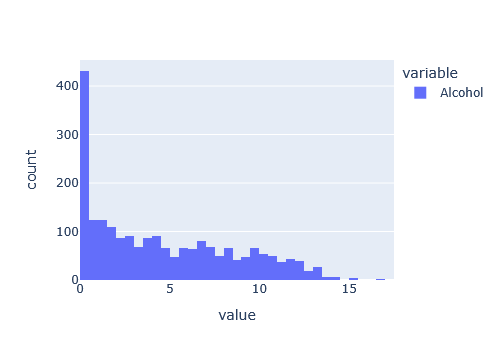

In [89]:
px.histogram(x_train['Alcohol'])

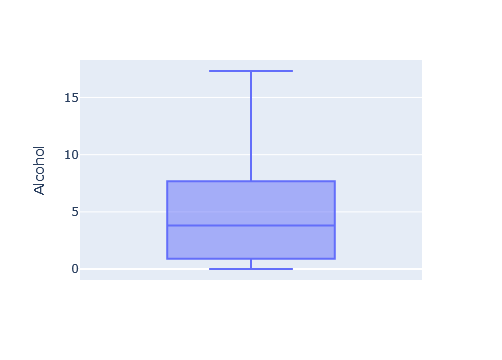

In [80]:
px.box(x_train,y='Alcohol')

In [82]:
x_train.Alcohol.mean()

np.float64(4.6320202952029526)

In [83]:
x_train.Alcohol.median()

np.float64(3.81)

In [93]:
from sklearn.impute import KNNImputer
knn=KNNImputer()
x_train[['Alcohol','Total_expenditure','GDP','Income_composition_of_resources','Schooling']]=knn.fit_transform(x_train[['Alcohol','Total_expenditure','GDP','Income_composition_of_resources','Schooling']])

In [94]:
x_test[['Alcohol','Total_expenditure','GDP','Income_composition_of_resources','Schooling']]=knn.transform(x_test[['Alcohol','Total_expenditure','GDP','Income_composition_of_resources','Schooling']])

In [95]:
x_train.isna().sum()

Year                               0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__10-19_years              0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
Status_developing                  0
Country_0                          0
Country_1                          0
Country_2                          0
Country_3                          0
Country_4                          0
Country_5                          0
Country_6                          0
C

In [97]:
x_train.columns

Index(['Year', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__10-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling',
       'Status_developing', 'Country_0', 'Country_1', 'Country_2', 'Country_3',
       'Country_4', 'Country_5', 'Country_6', 'Country_7'],
      dtype='object')

In [98]:
scaled_col=['Year', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__10-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling']

In [99]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler()
x_train[scaled_col]=rc.fit_transform(x_train[scaled_col])
x_test[scaled_col]=rc.transform(x_test[scaled_col])

In [100]:
x_train

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__10-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,Status_developing,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7
0,-0.125,-0.115894,-0.15,0.201930,0.617224,0.285714,-0.045519,-0.498641,-0.166667,0.263158,-0.477169,0.263158,0.740741,0.190684,-0.213236,0.872727,0.839286,-0.298068,-0.146699,1.0,0,0,0,0,0,0,0,1
1,-0.875,0.056291,-0.15,-0.016333,0.184524,0.000000,-0.045519,-0.591033,-0.166667,-0.105263,-0.195924,-4.421053,1.037037,-0.117330,-0.223243,1.109091,1.071429,-0.445262,-0.366748,1.0,0,0,0,0,0,0,0,1
2,0.375,-0.003311,-0.15,0.966592,-0.150452,0.500000,-0.045519,0.017663,-0.166667,0.315789,0.559330,0.315789,0.000000,0.718498,0.000000,0.181818,0.178571,0.183993,0.097800,1.0,0,0,0,0,0,0,1,0
3,0.625,-0.864238,0.00,-0.390497,1.170945,0.428571,0.000000,0.419837,-0.041667,0.263158,0.458208,0.263158,0.000000,0.372342,-0.066102,0.563636,0.535714,0.136155,0.537897,1.0,0,0,0,0,0,0,1,1
4,-0.750,-0.321192,-0.15,-0.562732,1.942165,0.500000,-0.045519,-0.430707,-0.166667,0.315789,-0.761574,0.052632,0.000000,2.485487,0.000000,0.618182,0.500000,0.504140,0.195599,1.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,0.375,-0.559603,-0.15,0.443950,7.852190,-0.714286,-0.036984,0.656250,-0.166667,0.157895,1.197662,0.157895,0.000000,3.483954,-0.229673,-0.454545,-0.464286,0.526219,0.562347,0.0,0,1,0,1,0,1,0,1
2306,0.250,0.950331,0.05,-0.105419,-0.031994,-0.642857,0.028450,-0.563859,0.125000,-0.578947,0.281245,-0.526316,8.592593,-0.238458,-0.290736,0.854545,0.821429,-1.022999,-0.880196,1.0,0,0,0,1,0,0,0,1
2307,-0.125,0.811258,0.70,0.320713,-0.024281,0.000000,-0.045519,-1.063859,0.791667,-1.631579,-0.079001,-1.578947,3.851852,-0.226450,1.911472,0.163636,0.160714,-0.827967,-1.002445,1.0,1,0,0,0,1,0,1,1
2308,-0.625,-0.473510,-0.05,0.798812,7.669908,0.214286,31.197724,0.357337,-0.041667,0.210526,0.745773,0.157895,0.000000,4.246784,1.015352,-0.509091,-0.500000,0.581417,0.709046,0.0,1,0,1,0,1,1,1,1
